<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">
        Data Winsorization
    </p>
</div>

---

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>What is Winsorization</strong>
<br>
• Winsorization is a technique used to limit extreme values in your data to reduce the impact of outliers. 
<br>
• Instead of removing outliers, winsorization replaces them with a specified percentile value. 
<br>
<br>
Here’s a quick overview of how to implement winsorization for outlier removal:
<br>
<br>
<strong>Select Percentiles</strong>
<br>
• Decide on the lower and upper percentiles to use for winsorization. 
<br>
• Common choices are the 5th and 95th percentiles, but this can vary depending on your data and analysis needs.
<br>
<strong>Calculate Percentiles</strong>
<br>
• Determine the lower and upper bounds based on the selected percentiles.
<br>
• To find percentiles, use Pandas df.quantile() function.
<br>
&nbsp;&nbsp;→ $\text{df.quantile(0.99)}$ - Calculates 99<sup>th</sup> percentile (upper bound).
<br>
&nbsp;&nbsp;→ $\text{df.quantile(0.01)}$ - Calculates 1<sup>st</sup> percentile (lower bound).
<br>
• For example, if you choose the 5th and 95th percentiles, compute these values from your dataset.
<br>
<strong>Replace Outliers</strong>
<br>
• For values below the lower percentile, replace them with the lower percentile value.
<br>
• For values above the upper percentile, replace them with the upper percentile value.
<br>
</div>

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading CSV File
df = pd.read_csv("weight-height.csv")
df.sample(5)

,Gender,Height,Weight
3331,Male,67.639215,164.583051
376,Male,67.247235,173.284033
9867,Female,65.622507,151.492031
3585,Male,76.453720,213.732348
1393,Male,68.342365,187.633463


In [4]:
# Shape of the DataFrame
df.shape

(10000, 3)

In [5]:
# Describing the Height Column
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

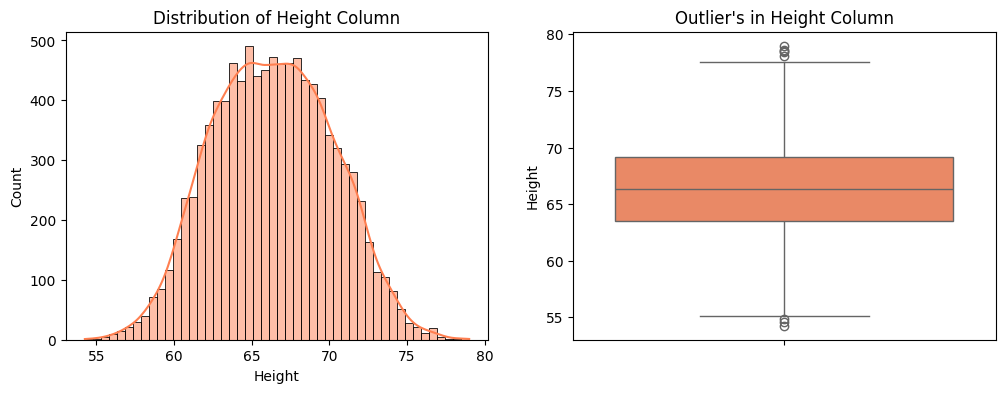

In [6]:
# Distribution of Height Column
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
sns.histplot(df["Height"], kde=True, color="coral", ax=ax[0])
ax[0].set_title("Distribution of Height Column")

# Outliers in Height Column
sns.boxplot(df["Height"], color="coral", ax=ax[1])
ax[1].set_title("Outlier's in Height Column")
plt.show()

In [7]:
# Upper limit for Outlier
upper_limit = df["Height"].quantile(0.99)
print("Upper Limit :", upper_limit)

# Lower limit for Outlier
lower_limit = df["Height"].quantile(0.01)
print("Lower Limit :", lower_limit)

Upper Limit : 74.7857900583366
Lower Limit : 58.13441158671655


<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">
        Trimming
    </p>
</div>

---

In [8]:
# Trimming DataFrame
new_df = df[(df["Height"] <= upper_limit) & (df["Height"] >= lower_limit)]

In [9]:
# Shape of the DataFrame
new_df.shape

(9800, 3)

In [10]:
# Describing the Height Column
new_df["Height"].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

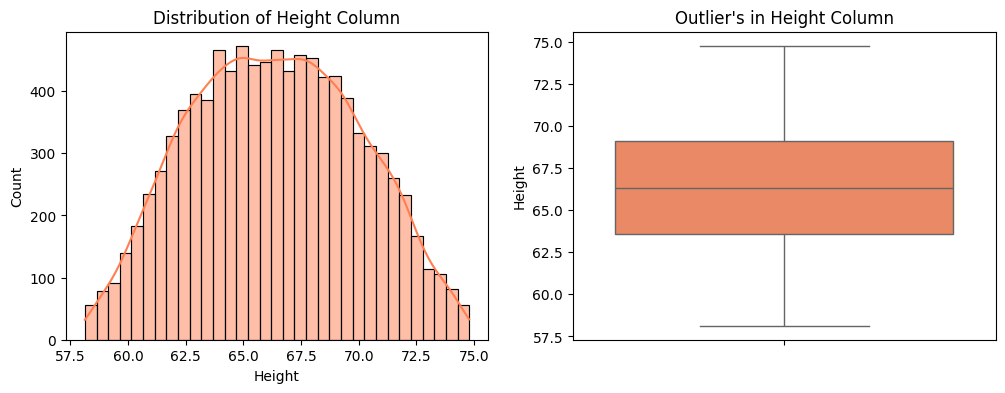

In [11]:
# Distribution of Height Column
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
sns.histplot(new_df["Height"], kde=True, color="coral", ax=ax[0])
ax[0].set_title("Distribution of Height Column")

# Outliers in Height Column
sns.boxplot(new_df["Height"], color="coral", ax=ax[1])
ax[1].set_title("Outlier's in Height Column")
plt.show()

<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">
        Capping
    </p>
</div>

---

In [12]:
# Capping values that are Outlier
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [13]:
# Shape of the DataFrame
df.shape

(10000, 3)

In [14]:
# Describing the Height Column
df["Height"].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

Text(0.5, 1.0, "Outlier's in Height Column")

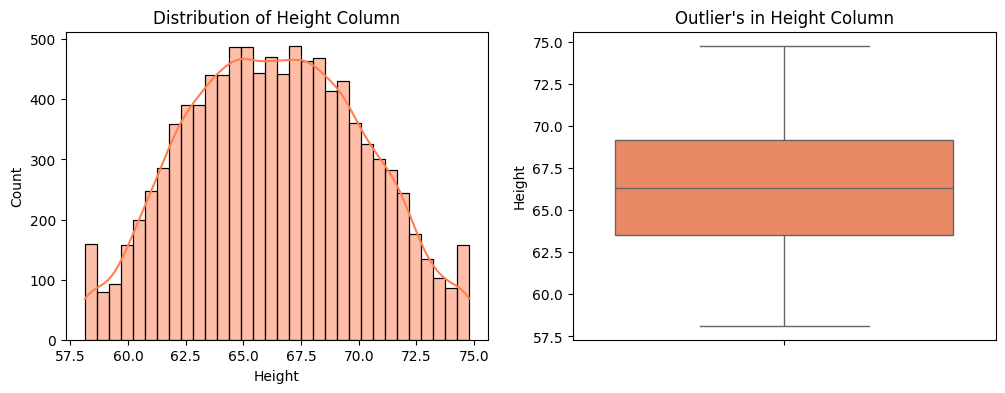

In [15]:
# Distribution of Height Column
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
sns.histplot(df["Height"], kde=True, color="coral", ax=ax[0])
ax[0].set_title("Distribution of Height Column")

# Box Plot of Height Column
sns.boxplot(df["Height"], color="coral", ax=ax[1])
ax[1].set_title("Outlier's in Height Column")